In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [15]:
df = pd.read_csv("df_DBSCAN.csv", skipinitialspace=True, sep=',')
df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TotalPrice,CostOverOdo,labels_DBSCAN
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
1,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
2,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,19662,78219,TX,10835.0,0,920,NaN,11755.0,0.148980,0
3,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
4,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50901,2009-03-03,ZEPHYR,SEDAN,2006,32556,0,MANHEIM,3,LINCOLN,NaN,...,3453,80022,CO,9215.0,0,1118,4D,10333.0,0.133597,0
50902,2009-04-14,ZEPHYR,SEDAN,2006,33398,0,MANHEIM,3,LINCOLN,3.0L SFI,...,5546,34761,FL,10265.0,0,1118,4D,11383.0,0.150354,0
50903,2010-09-22,ZEPHYR,SEDAN,2006,42247,1,OTHER,4,LINCOLN,NaN,...,52492,27407,NC,9005.0,0,1272,4D,10277.0,0.124830,0
50904,2010-07-14,ZEPHYR,SEDAN,2006,70031,0,ADESA,4,LINCOLN,NaN,...,21053,85226,AZ,8615.0,0,1272,4D,9887.0,0.121686,0


In [16]:
indexNames = df[df['labels_DBSCAN'] == -1 ].index
df.drop(indexNames , inplace=True)

In [17]:
df

,PurchDate,Model,SubModel,VehYear,RefId,IsBadBuy,Auction,VehicleAge,Make,Engine,...,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Doors,TotalPrice,CostOverOdo,labels_DBSCAN
0,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
1,2009-07-28,1500 RAM,EXT CAB,2001,61608,1,ADESA,8,DODGE,5.2L,...,23359,91752,CA,4315.0,0,1054,4D,5369.0,0.078288,0
2,2009-02-25,1500 RAM,MEGA CAB,2006,50261,0,MANHEIM,3,DODGE,5.7L,...,19662,78219,TX,10835.0,0,920,NaN,11755.0,0.148980,0
3,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
4,2009-01-12,1500 RAM,MEGA CAB,2006,33703,0,MANHEIM,3,DODGE,5.7L,...,19619,34761,FL,11515.0,0,983,NaN,12498.0,0.142777,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50901,2009-03-03,ZEPHYR,SEDAN,2006,32556,0,MANHEIM,3,LINCOLN,NaN,...,3453,80022,CO,9215.0,0,1118,4D,10333.0,0.133597,0
50902,2009-04-14,ZEPHYR,SEDAN,2006,33398,0,MANHEIM,3,LINCOLN,3.0L SFI,...,5546,34761,FL,10265.0,0,1118,4D,11383.0,0.150354,0
50903,2010-09-22,ZEPHYR,SEDAN,2006,42247,1,OTHER,4,LINCOLN,NaN,...,52492,27407,NC,9005.0,0,1272,4D,10277.0,0.124830,0
50904,2010-07-14,ZEPHYR,SEDAN,2006,70031,0,ADESA,4,LINCOLN,NaN,...,21053,85226,AZ,8615.0,0,1272,4D,9887.0,0.121686,0


In [18]:
columns_toAnalyze = ['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'VehBCost', 'WarrantyCost', 'CostOverOdo']

primoDF = df[columns_toAnalyze]

primoDF.head()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,VehBCost,WarrantyCost,CostOverOdo
0,8,55117,3192.0,4315.0,1054,0.078288
1,8,55117,3192.0,4315.0,1054,0.078288
2,3,72728,12423.0,10835.0,920,0.148980
3,3,80650,13271.0,11515.0,983,0.142777
4,3,80650,13271.0,11515.0,983,0.142777


In [21]:
Random_df = pd.DataFrame(np.random.randn(primoDF["VehBCost"].count(), len(primoDF.columns)), columns = columns_toAnalyze)

In [22]:
iterazioni = [5, 6]

In [23]:
for i in iterazioni:
    print('numero cluster:')
    print(i)
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete')  
    cluster.fit_predict(primoDF)
    print("silhouette complete")
    x = silhouette_score(primoDF, cluster.labels_)
    print(x)
    print(np.unique(cluster.labels_, return_counts=True))
    
    clusterrandom = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete') 
    clusterrandom.fit_predict(Random_df)
    print('differenza con random complete')
    print(x - silhouette_score(Random_df, clusterrandom.labels_))
    
    
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(primoDF)
    print("silhouette ward")
    x = silhouette_score(primoDF, cluster.labels_)
    print(x)
    print(np.unique(cluster.labels_, return_counts=True))
    
    clusterrandom = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='complete') 
    clusterrandom.fit_predict(Random_df)
    print('differenza con random ward')
    print(x - silhouette_score(Random_df, clusterrandom.labels_))
    
    
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')  
    cluster.fit_predict(primoDF)
    print("silhouette average")
    x = silhouette_score(primoDF, cluster.labels_)
    print(x) 
    print(np.unique(cluster.labels_, return_counts=True))
    
    clusterrandom = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average') 
    clusterrandom.fit_predict(Random_df)
    print('differenza con random average')
    print(x - silhouette_score(Random_df, clusterrandom.labels_)) 
    
    
    cluster = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')  
    cluster.fit_predict(primoDF)
    print("silhouette single")
    x = silhouette_score(primoDF, cluster.labels_) 
    print(x)
    print(np.unique(cluster.labels_, return_counts=True))

    clusterrandom = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single') 
    clusterrandom.fit_predict(Random_df)
    print('differenza con random single')
    print(x - silhouette_score(Random_df, clusterrandom.labels_))

numero cluster:
5
silhouette complete
0.3663157958145133
(array([0, 1, 2, 3, 4], dtype=int64), array([ 1695, 23803, 13915, 10137,  1300], dtype=int64))
differenza con random complete
0.38014096790419233
silhouette ward
0.3385657938519316
(array([0, 1, 2, 3, 4], dtype=int64), array([16666,  8818, 11018,  3585, 10763], dtype=int64))
differenza con random ward
0.3523909659416106
silhouette average
0.371657963347606
(array([0, 1, 2, 3, 4], dtype=int64), array([ 3890,   759,  7238, 26239, 12724], dtype=int64))
differenza con random average
0.09828710988900086
silhouette single
0.3393922031625495
(array([0, 1, 2, 3, 4], dtype=int64), array([50842,     2,     1,     3,     2], dtype=int64))
differenza con random single
0.013973108192311734
numero cluster:
6
silhouette complete
0.3591152014964873
(array([0, 1, 2, 3, 4, 5], dtype=int64), array([23803,  1300, 13915, 10137,  1598,    97], dtype=int64))
differenza con random complete
0.3652493558638892
silhouette ward
0.33181685672908107
(array([0

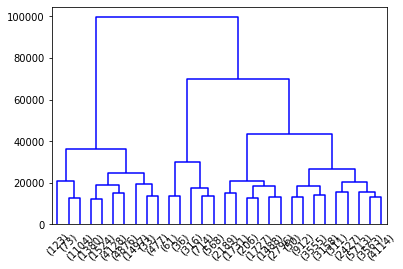

In [25]:
data_dist = pdist(primoDF, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

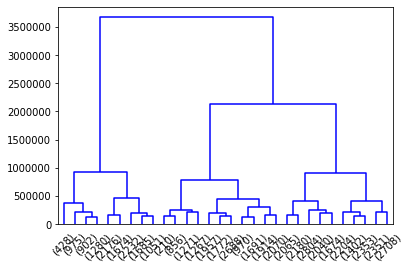

In [26]:
data_dist = pdist(primoDF, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

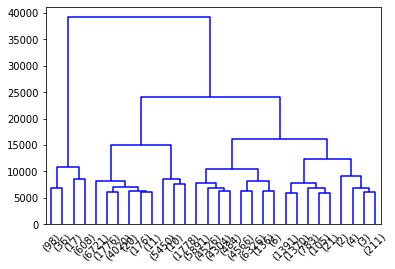

In [27]:
data_dist = pdist(primoDF, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

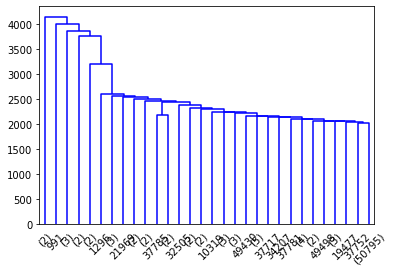

In [28]:
data_dist = pdist(primoDF, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')